## Bagging with Decision Trees

### Import packages

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from plot_utils import plot_2d_data, plot_2d_classifier
import matplotlib.pyplot as plt

### Training

In [3]:
rng = np.random.RandomState(seed=4190)
def bagging_fit(X, y, n_estimators, max_depth=5, max_samples=200):
    n_examples = len(y)   
    estimators = [DecisionTreeClassifier(max_depth=max_depth)  
                  for _ in range(n_estimators)]  
    
    for tree in estimators:
        bag = np.random.choice(n_examples, max_samples, replace=True)  
        tree.fit(X[bag, :], y[bag])  
        
    return estimators

### Prediction

In [4]:
def bagging_predict(X, estimators):
    all_predictions = np.array([tree.predict(X) for tree in estimators])  
    ypred, _ = mode(all_predictions, axis=0, keepdims=False)  
    return np.squeeze(ypred)

In [5]:
X, y = make_moons(n_samples=300, noise=.25, random_state=rng)
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.33, random_state=rng)
bag_ens = bagging_fit(Xtrn, ytrn, n_estimators=500,
                      max_depth=12, max_samples=300)
ypred = bagging_predict(Xtst, bag_ens)

print(accuracy_score(ytst, ypred))

0.898989898989899


In [6]:
ensembleAcc = accuracy_score(ytst, ypred)
print('Bagging: Holdout accuracy = {0:4.2f}%.'.format(ensembleAcc * 100))

tree = DecisionTreeClassifier(max_depth=12)
ypred_single = tree.fit(Xtrn, ytrn).predict(Xtst)
treeAcc = accuracy_score(ytst, ypred_single)
print('Single Decision Tree: Holdout test accuracy = {0:4.2f}%.'.format(treeAcc * 100))

Bagging: Holdout accuracy = 89.90%.
Single Decision Tree: Holdout test accuracy = 89.90%.


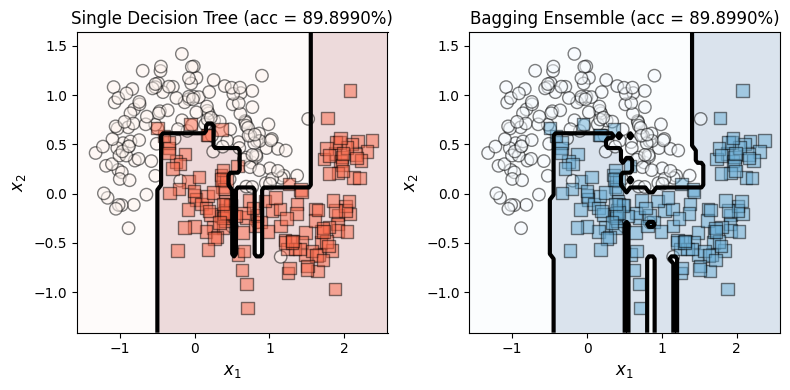

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

title = 'Single Decision Tree (acc = {0:4.4f}%)'.format(treeAcc*100)
plot_2d_classifier(ax[0], X, y, colormap='Reds', alpha=0.15, s=80,
                   predict_function=tree.predict,
                   xlabel='$x_1$', ylabel='$x_2$', title=title)

title = 'Bagging Ensemble (acc = {0:4.4f}%)'.format(ensembleAcc*100)
plot_2d_classifier(ax[1], X, y, colormap='Blues', alpha=0.15, s=80,
                   predict_function=bagging_predict, predict_args=(bag_ens),
                   xlabel='$x_1$', ylabel='$x_2$', title=title)

fig.tight_layout()